# Almog PIV project

Post analysis, see also the analysis*.ipynb

February 15
Run 1 


In [90]:
from pivpy import pivpy, io, graphics
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 10)

In [91]:
## Initialize data location

In [92]:
import pathlib
root_path = pathlib.Path('/media/user/ExtremePro/almog/feb15-')
analysis_path = root_path / 'Analysis'
image_path = root_path / 'RawData'

# run 1:
run_no = 1
first_file = 100
num_files = 100
d = 10 # mm 


list_files = sorted(analysis_path.rglob('feb15-000*.vec'))
netcdf_file = f'../data/feb15_run{run_no}.nc'
res_png = f'../results/feb15-run{run_no}.png'

In [93]:
# since we have some demo files 200, 202, we need to start with 210
ids = np.array([int(str(f).split('feb15-')[-1].split('.')[0]) for f in list_files])

# manually substitute the first and the last files
selection = np.nonzero([(ids >= first_file) & (ids<first_file+num_files)])

list_files = np.array(list_files)[selection[1]]

In [94]:
len(list_files), list_files[0], list_files[-1]

(100,
 PosixPath('/media/user/ExtremePro/almog/feb15-/Analysis/feb15-000100.T000.D000.P000.H000.L.vec'),
 PosixPath('/media/user/ExtremePro/almog/feb15-/Analysis/feb15-000199.T000.D000.P000.H000.L.vec'))

## Load PIV data from the NetCDF4 file

In [95]:
ds = xr.load_dataset(netcdf_file)

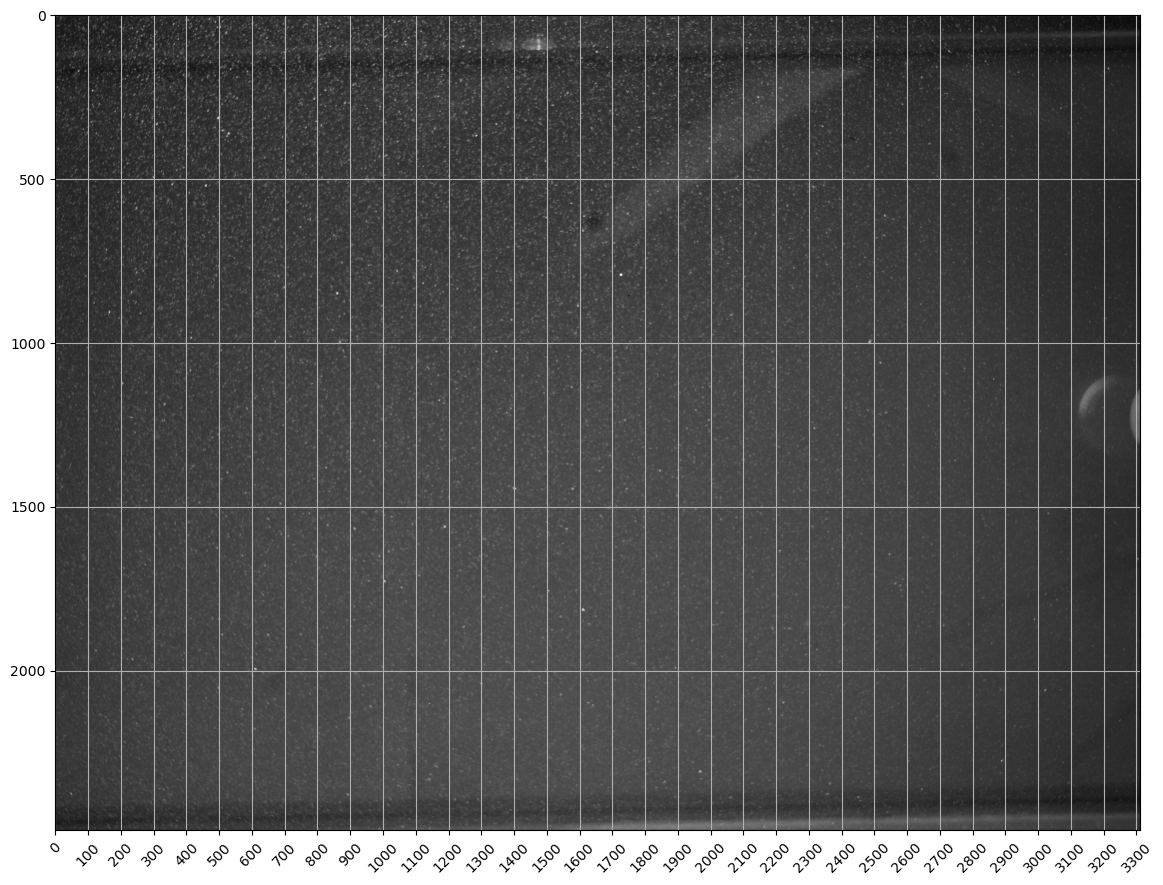

In [96]:
# im = plt.imread('/media/user/ExtremePro/amiad/spacer_68_/RawData/test000120.T000.D000.P000.H000.LB.TIF')
im = plt.imread(image_path / 'feb15-000100.T000.D000.P000.H000.LA.TIF')

from skimage import exposure 
plt.figure(figsize=(14,14))
plt.imshow(exposure.adjust_gamma(im,.3), cmap='gray')
plt.xticks(np.arange(0,im.shape[1],100),rotation=45)
plt.grid('on')


In [97]:
# right point on 1 is 3240, 1387
# left point on 24 36, 1452
# open the scale image
dist = np.sqrt((3240-36)**2 + (1452-1387)**2)
dist

3204.6592642588384

In [98]:
# we measured 
mm_scale = 230 # mm
pix_scale = 3204 # pix, see above
dt = 10000e-6 # 10,000 microseconds = 10 msec = 0.01 sec

# ds = ds.piv.set_scale(mm_scale/pix_scale)
# ds = ds.piv.set_delta_t(dt)
ds['u'] = ds['u']*mm_scale/pix_scale
ds['v'] = ds['v']*mm_scale/pix_scale
ds['u'] = ds.u / dt
ds['v'] = ds.v / dt

# # now size is in mm and velocity in m/s

ave = ds.piv.average

In [99]:
# import napari
# viewer = napari.Viewer()
# viewer.add_image(im)
# manually measured 750 pixels which is the width 24 mm 

In [100]:
# we measured the small diameter  17.8 mm
# and we see from the above photo 
# in /media/user/ExtremePro/amiad_20-Nov_/spacer_68_/RawData
# that it's from 850 to 2300 pix, i.e. 1450 pix

(<Figure size 2000x2000 with 2 Axes>,
 <AxesSubplot: xlabel='x (pix)', ylabel='y (pix)'>)

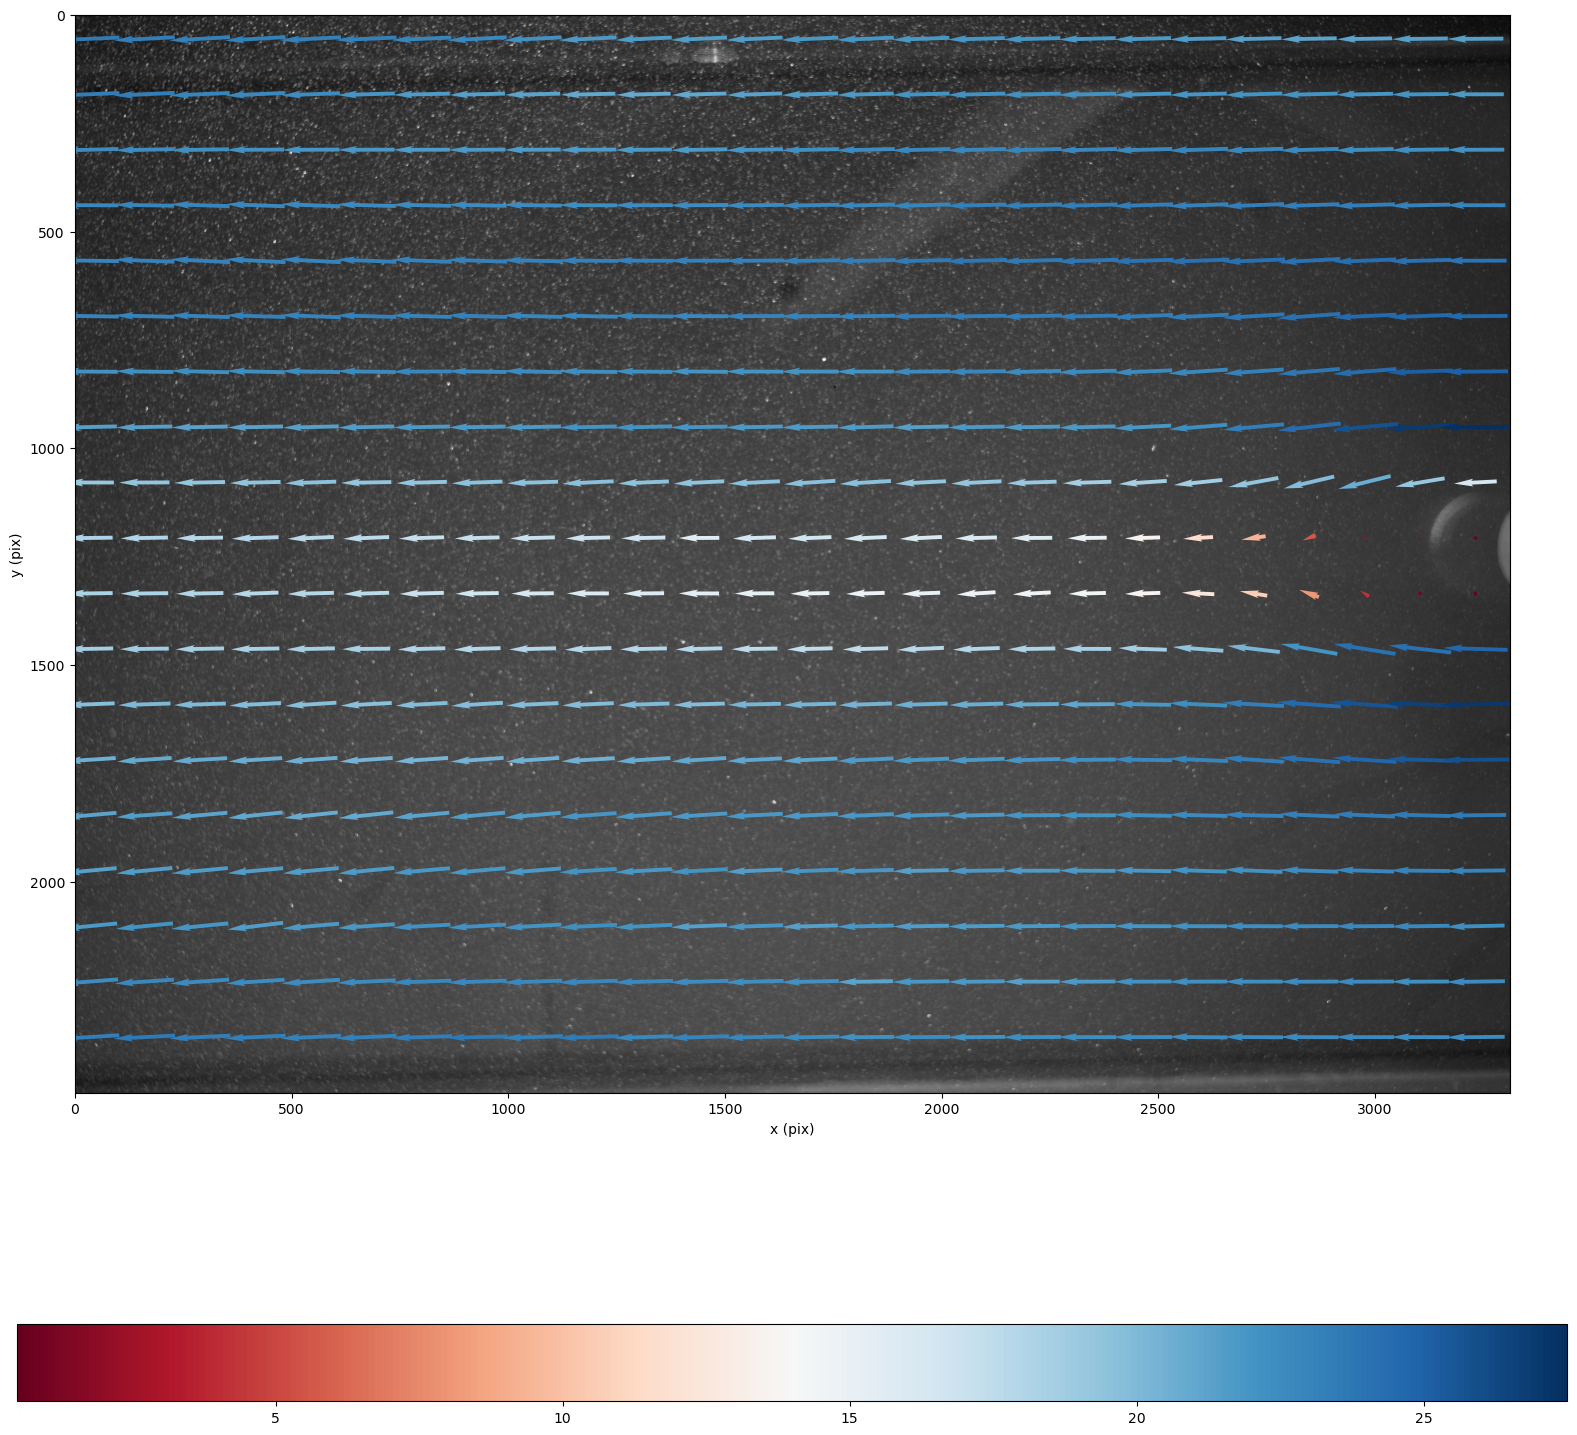

In [101]:
plt.figure(figsize=(20,20))
plt.imshow(exposure.adjust_gamma(im,.3), cmap='gray',origin='upper')
tmp = ave.copy(deep=True)
tmp['y'] = tmp['y'][::-1]

tmp.piv.quiver(arrScale = 20,colorbar=True, colorbar_orient='horizontal', nthArr = 4)
# plt.gca().invert_yaxis()
# plt.savefig('./results/feb15-run1.png',dpi=200)

## Figures

Almog prepared a document on overleaf about the PIV analysis. the link is here
https://www.overleaf.com/project/63f5eeb8f7fb1a583f248b22


1. we normalize everything to the cylinder_scale $d$ and $U_\infty$
2. We plot $V_x(y)$ to see that it is close to 1 and perpendicular to see that the flow is not affected by the walls



(<Figure size 1000x1000 with 2 Axes>,
 <AxesSubplot: xlabel='x (pix)', ylabel='y (pix)'>)

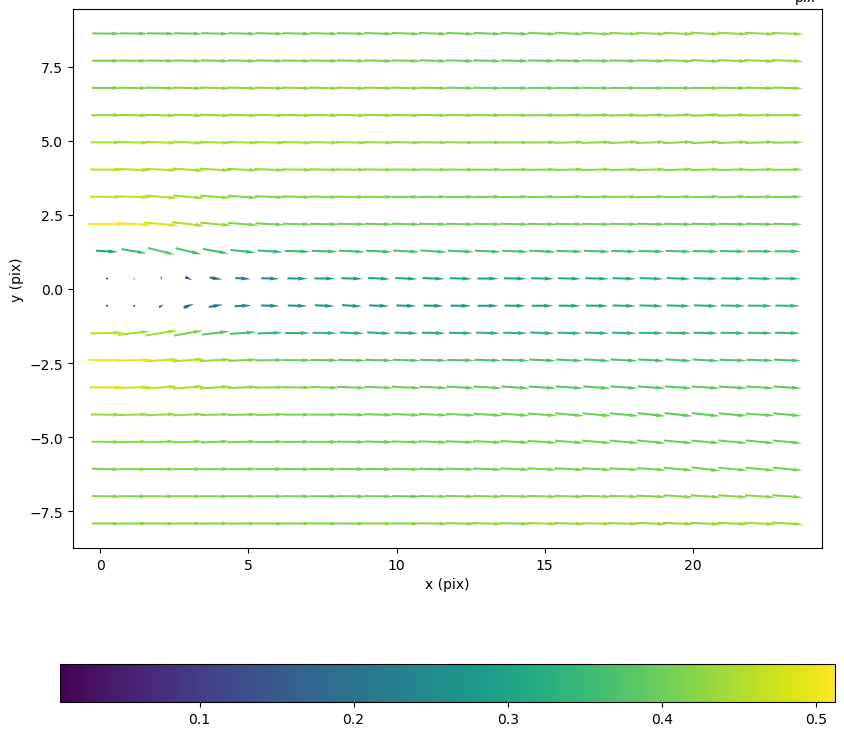

In [102]:
# non dimensionalization
# ds is scaled above, but not completely, to comply with images

ds = xr.load_dataset(netcdf_file)

# we measured 
mm_scale = 230 # mm
pix_scale = 3204 # pix, see above
dt = 10000e-6 # 10,000 microseconds = 10 msec = 0.01 sec

# ds = ds.piv.set_scale(mm_scale/pix_scale)
# ds = ds.piv.set_delta_t(dt)
ds['u'] = ds['u']*mm_scale/pix_scale
ds['v'] = ds['v']*mm_scale/pix_scale
ds['u'] = ds.u / dt
ds['v'] = ds.v / dt

# # now size is in mm and velocity in m/s

ave = ds.piv.average


ave['x'] = ave['x']*mm_scale/pix_scale / d # in mm, so it's now dimensionless
ave['y'] = ave['y']*mm_scale/pix_scale / d 

ave['x'] = ave['x'].max() - ave['x']
ave['y'] = ave['y'] - 9

ave['u'] = -1*ave['u']

U_infty = 53.68 # mm/s, see  overleaf document, table 2
ave['u'] = ave['u'] / U_infty
ave['v'] = ave['v'] / U_infty


ave.piv.quiver(arrScale = 20,colorbar=True, colorbar_orient='horizontal', nthArr = 4, cmap='viridis')


(array([4.00000e+00, 6.70000e+01, 1.97430e+04, 3.55660e+05, 3.21613e+05,
        5.63880e+04, 1.26980e+04, 7.31700e+03, 1.62400e+03, 8.60000e+01]),
 array([-46.5742319 , -40.39468823, -34.21514457, -28.03560091,
        -21.85605724, -15.67651358,  -9.49696991,  -3.31742625,
          2.86211742,   9.04166108,  15.22120474]),
 <BarContainer object of 10 artists>)

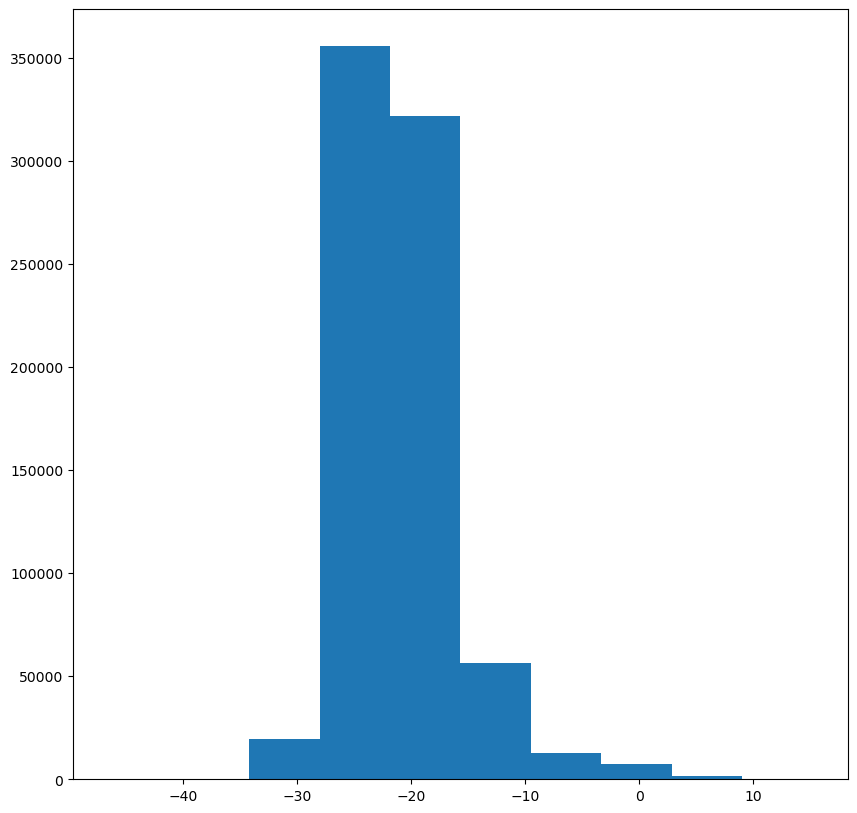

In [103]:
plt.hist(ds.u.values.flatten())

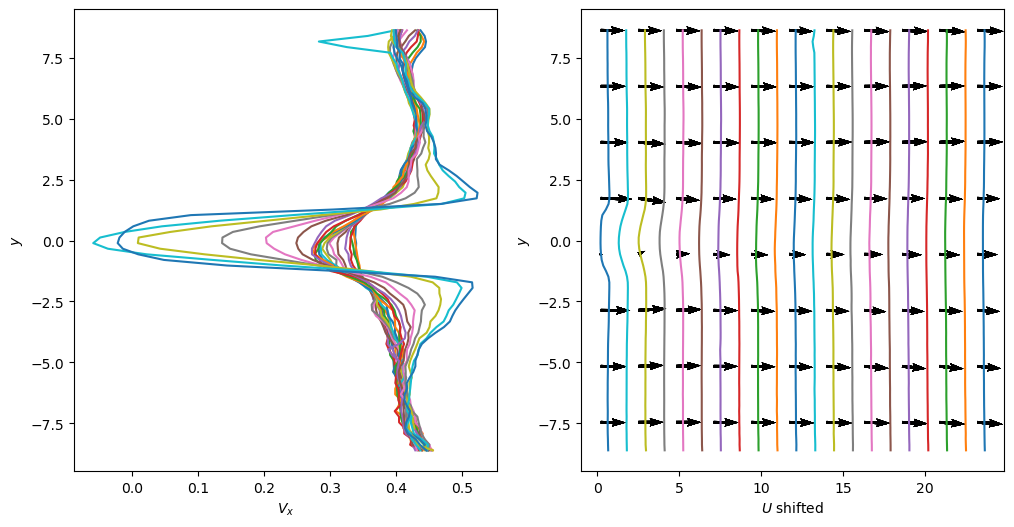

In [104]:
fig,ax = plt.subplots(1,2,figsize=(12,6))

for x in ave.x[::5]:
    tmp = ave.sel(x=x, method='nearest')
    ax[0].plot(tmp.u, tmp.y)
    ax[0].set_xlabel('$V_x$')
    ax[0].set_ylabel('$y$')
    
    ax[1].quiver(ave['x'][::10],ave['y'][::10],ave['u'][::10,::10].T,ave['v'][::10,::10].T)
    ax[1].plot(tmp.u + x, tmp.y)
    ax[1].set_xlabel('$U$ shifted')
    ax[1].set_ylabel('$y$')

In [105]:
ave.sel(x=5,method='nearest')

<xarray.Dataset>
Dimensions:  (y: 76)
Coordinates:
    x        float64 5.054
  * y        (y) float64 8.623 8.394 8.164 7.934 ... -7.916 -8.146 -8.375 -8.605
Data variables:
    u        (y) float64 0.403 0.3994 0.4009 0.4022 ... 0.4247 0.4272 0.4359
    v        (y) float64 -0.01146 -0.01084 -0.008954 ... -0.004838 -0.001877
    chc      (y) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.33 1.0 3.7
Attributes: (2)